# Miscellanea

In [1]:
import os
from pathlib import Path

# This is a terrible hack, and very unsafe
while not Path("config_data").exists():
    os.chdir("..")

In [2]:
print(os.getcwd())

/home/enrico/slim


In [5]:
from pathlib import Path
from slim.simulation.config import Config
from slim.simulation.simulator import Simulator, _get_simulation_path, load_artifact
import ray

def load_data(config_folder: str, sim_name: str, farms_per_process=1, **kwargs):
    quiet = kwargs.pop("quiet", False)
    sim_name = sim_name + "_" + str(kwargs)
    cfg_data_path = Path("config_data")
    cfg_data = cfg_data_path / "config.json"
    config_folder = cfg_data_path / config_folder
    outputs_path = Path("outputs")
    
    artifact = _get_simulation_path(outputs_path, sim_name)[0]
    print(artifact)
    if not artifact.exists():
        print(f"Artifact not yet generated, running {sim_name}")
        # defection_proba is farm-specific and needs special handling
        defection_proba = kwargs.pop("defection_proba", None)
        cfg = Config(cfg_data, config_folder, farms_per_process=farms_per_process, **kwargs)

        if defection_proba is not None:
            for farm in cfg.farms:
                farm.defection_proba = defection_proba
        
        sim = Simulator(outputs_path, sim_name, cfg)
        
        sim.run_model(quiet=quiet)
    return load_artifact(outputs_path, sim_name)

@ray.remote
def _launch(cfg_path, sim_name, **kwargs):
    return load_data(cfg_path, sim_name, **kwargs)
    
def generate_multiple_trials(config_folder: str, sim_name: str, **kwargs):
    seeds = [0, 42, 65535]
    #tasks = [_launch.remote(config_folder, sim_name, quiet=True, seed=seed, **kwargs) for seed in seeds]
    #return ray.get(tasks)
    to_return = []
    for seed in seeds:
        to_return.append(load_data(config_folder, sim_name, quiet=False, seed=seed, **kwargs))
    
    return to_return

In [6]:
trials = generate_multiple_trials("Fyne_complete", "Fyne_complete_bernoulli", treatment_strategy="bernoulli", defection_proba=2/10)
# trial = load_data("Fyne_complete", "Fyne_complete_bernoulli", treatment_strategy="bernoulli", defection_proba=2/10)

outputs/simulation_data_Fyne_complete_bernoulli_{'treatment_strategy': 'bernoulli', 'defection_proba': 0.2}.pickle.lz4
Artifact not yet generated, running Fyne_complete_bernoulli_{'treatment_strategy': 'bernoulli', 'defection_proba': 0.2}


 34%|███████████████████████▌                                             | 249/730 [00:26<00:51,  9.28it/s]
Traceback (most recent call last):
  File "/home/enrico/slim/slim/simulation/simulator.py", line 346, in run_model
    self.env.step(action)
  File "/home/enrico/miniconda3/envs/slp/lib/python3.8/site-packages/pettingzoo/utils/wrappers/order_enforcing.py", line 62, in step
    super().step(action)
  File "/home/enrico/miniconda3/envs/slp/lib/python3.8/site-packages/pettingzoo/utils/wrappers/base.py", line 94, in step
    self.env.step(action)
  File "/home/enrico/miniconda3/envs/slp/lib/python3.8/site-packages/pettingzoo/utils/wrappers/assert_out_of_bounds.py", line 17, in step
    super().step(action)
  File "/home/enrico/miniconda3/envs/slp/lib/python3.8/site-packages/pettingzoo/utils/wrappers/base.py", line 94, in step
    self.env.step(action)
  File "/home/enrico/slim/slim/simulation/simulator.py", line 182, in step
    payoffs, logs = self.organisation.step(self.cur_day, a

Stopping farms


/home/enrico/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
  probas = config_matrix / sums


outputs/simulation_data_Fyne_complete_bernoulli_{'treatment_strategy': 'bernoulli', 'defection_proba': 0.2}.pickle.lz4
outputs/simulation_data_Fyne_complete_bernoulli_{'treatment_strategy': 'bernoulli', 'defection_proba': 0.2}.pickle.lz4


In [4]:
#bernoullis = [load_data("Fyne_complete", f"Fyne_complete_bernoulli_{i/10}", treatment_strategy="bernoulli", defection_proba=i / 10)  for i in range(11)]

Artifact not yet generated, running Fyne_complete_bernoulli_0.0 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.0} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:36<00:00,  7.57it/s]


Stopping farms


/home/enrico/slim/slim/simulation/lice_population.py:612: RuntimeWarning: invalid value encountered in true_divide
  probas = config_matrix / sums


Artifact not yet generated, running Fyne_complete_bernoulli_0.1 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.1} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:38<00:00,  7.43it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.2 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.2} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:38<00:00,  7.41it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.3 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.3} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:42<00:00,  7.12it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.4 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.4} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:40<00:00,  7.25it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.5 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.5} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:44<00:00,  6.96it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.6 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.6} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:42<00:00,  7.12it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.7 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.7} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:29<00:00,  8.16it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.8 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.8} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:29<00:00,  8.12it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_0.9 with {'treatment_strategy': 'bernoulli', 'defection_proba': 0.9} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:24<00:00,  8.59it/s]


Stopping farms
Artifact not yet generated, running Fyne_complete_bernoulli_1.0 with {'treatment_strategy': 'bernoulli', 'defection_proba': 1.0} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:12<00:00, 10.08it/s]


Stopping farms


In [9]:
#mosaic = load_data("Fyne_complete", "Fyne_complete_mosaic", treatment_strategy="mosaic")

Artifact not yet generated, running Fyne_complete_mosaic with {'treatment_strategy': 'mosaic'} options


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [01:39<00:00,  7.31it/s]


Stopping farms


In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from slim.simulation.lice_population import LicePopulation, geno_to_alleles
from slim.simulation.config import Config
import numpy as np

# TODO: this is largely copied from plots.py but largely simplified due to a (thankfully) better API.

def prepare_ax(ax, farm_name, ylabel="Lice Population", yscale="log", ylim=(1, 1e10)):
    ax.set_title(farm_name, fontsize=18)
    ax.grid(True, axis='y')
    ax.set_ylim(*ylim)
    ax.set_yscale(yscale)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel("Days", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

def get_treatment_regions(
    first_treatment_time, farm_df: pd.DataFrame
):
    # generate treatment regions
    # treatment markers
    #cm = pg.colormap.get("Pastel1", source="matplotlib", skipCache=True)
    #colors = cm.getColors(1)
    colors = cm.get_cmap("Pastel1")

    regions = []
    for treatment_idx in range(2):
        color = colors(treatment_idx, alpha=0.5)
        
        treatment_days_df = (
            farm_df[
                farm_df["current_treatments"].apply(
                    lambda l: bool(l[treatment_idx])
                )
            ]["timestamp"]
            - first_treatment_time
        )
        treatment_days = treatment_days_df.apply(lambda x: x.days).to_numpy()

        # Generate treatment regions by looking for the first non-consecutive treatment blocks.
        # There may be a chance where multiple treatments happen consecutively, on which case
        # we simply consider them as a unique case.
        # Note: this algorithm fails when the saving rate is not 1. This is not a problem as
        # precision is not required here.

        if len(treatment_days) > 0:
            treatment_ranges = []
            lo = 0
            for i in range(1, len(treatment_days)):
                if treatment_days[i] > treatment_days[i - 1] + 1:
                    range_ = (treatment_days[lo], treatment_days[i - 1])
                    #if range_[1] - range_[0] <= 2:
                    #    range_ = (range_[0] - 5, range_[0] + 5)
                    treatment_ranges.append(range_)
                    lo = i

            # since mechanical treatments are applied and effective for only one day we simulate a 10-day padding
            # This is also useful when the saving rate is not 1
            range_ = (treatment_days[lo], treatment_days[-1])
            #if range_[1] - range_[0] <= 2:
            #    range_ = (range_[0] - 5, range_[0] + 5)
            treatment_ranges.append(range_)

            regions.extend([(trange, color) for trange in treatment_ranges])
    return regions

def plot_regions(ax, xs, regions):
    for region, color in regions:
        if region[1] - region[0] <= 2:
            ax.axvline(region[0], 0, 1e20, linestyle=":")
        else:
            ax.fill_between(xs, 0, 1e20, where=(region[0] <= xs) & (xs <= region[1]),
                        color=color, transform=ax.get_xaxis_transform())

def plot_farm(farm_df, gross_ax, geno_ax, fish_ax, agg_ax, payoff_ax):
    stages = LicePopulation.lice_stages
    stages_readable= LicePopulation.lice_stages_bio_labels
    first_day = farm_df.iloc[0]["timestamp"]
    regions = get_treatment_regions(first_day, farm_df)
    xs = np.arange(len(farm_df))
    alleles = geno_to_alleles(0)

    for stage in stages:
        per_geno = farm_df[stage]
        total = per_geno.apply(lambda x: sum(x.values()))
        prepare_ax(gross_ax, "By stage")
        gross_ax.plot(total, label=stages_readable[stage])
        plot_regions(gross_ax, xs, regions)

    for allele in alleles:
        per_allele = farm_df[allele]
        
        prepare_ax(geno_ax, "By geno")
        geno_ax.plot(per_allele, label=allele)
        plot_regions(geno_ax, xs, regions)
    
    farm_population = farm_df["fish_population"].apply(lambda x: sum(x) / len(x))
    farm_agg = farm_df["aggregation"].apply(lambda x: sum(x) / len(x))
    
    prepare_ax(fish_ax, "By fish population",
               ylim=(0, 150000), yscale="linear")
    fish_ax.plot(farm_population)
    plot_regions(fish_ax, xs, regions)

    prepare_ax(agg_ax, "By lice aggregation",
                    ylim=(0, 10), yscale="linear")
    plot_regions(agg_ax, xs, regions)
    
    agg_ax.plot(farm_agg)
    prepare_ax(payoff_ax, "Payoff", ylim=(-1e7, 1e5), yscale="linear")
    payoff_ax.plot(farm_df.payoff)
    plot_regions(payoff_ax, xs, regions)
    gross_ax.legend()
    geno_ax.legend()


def plot_data(dataframe: pd.DataFrame, cfg: Config, title: str):
    dfs_per_farm = {x: y.reset_index() for x, y in dataframe.reset_index().groupby("farm_id")}
    # lice-pop-agg    fish pop
    # lice-pop-stage  lice agg
    width=26
    n = cfg.nfarms
    
    print(title) # TODO
    
    for i, (farm, farm_df) in enumerate(dfs_per_farm.items()):
        farm_name = cfg.farms[int(farm[len("farm_")])].name
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(width, 9/16 * width))
        fig.suptitle(farm_name, fontsize=30)
        payoff_fig = plt.figure(figsize=(width / 2, 9/32 * width)).subplots(1, 1)
        plot_farm(farm_df, axs[0][0], axs[1][0], axs[0][1], axs[1][1], payoff_fig)
        fig.savefig(f"outputs/{title} {farm_name}.pdf")
    
    plt.show()

bernoulli_0.2


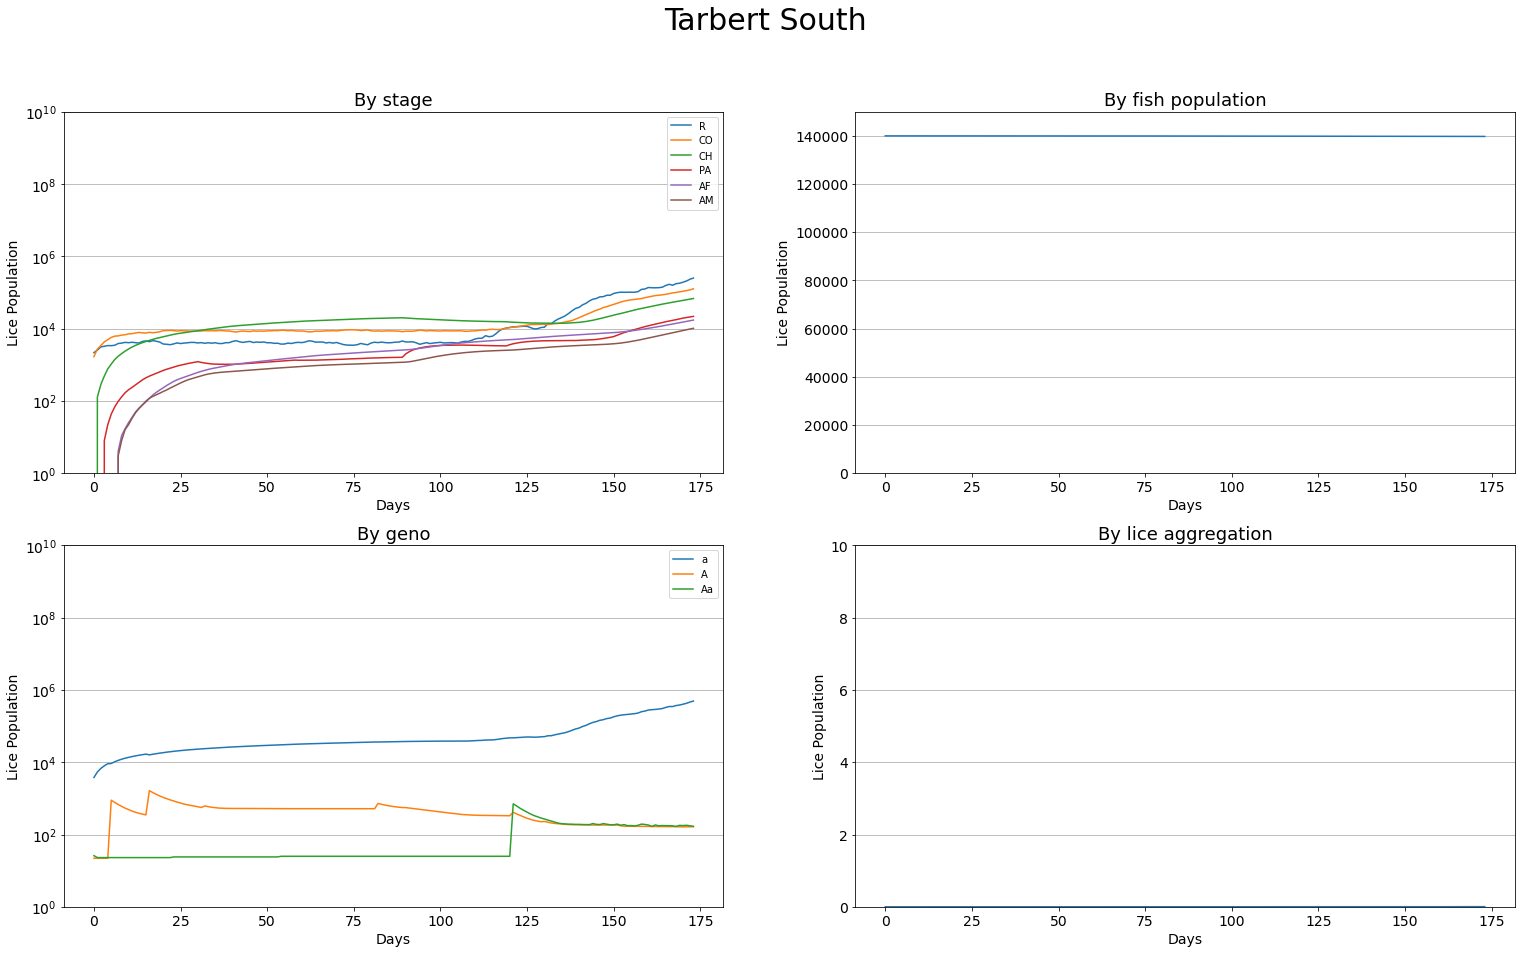

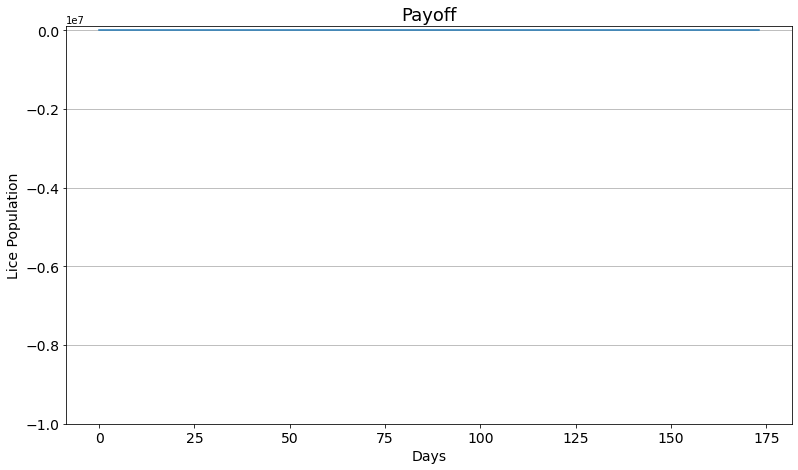

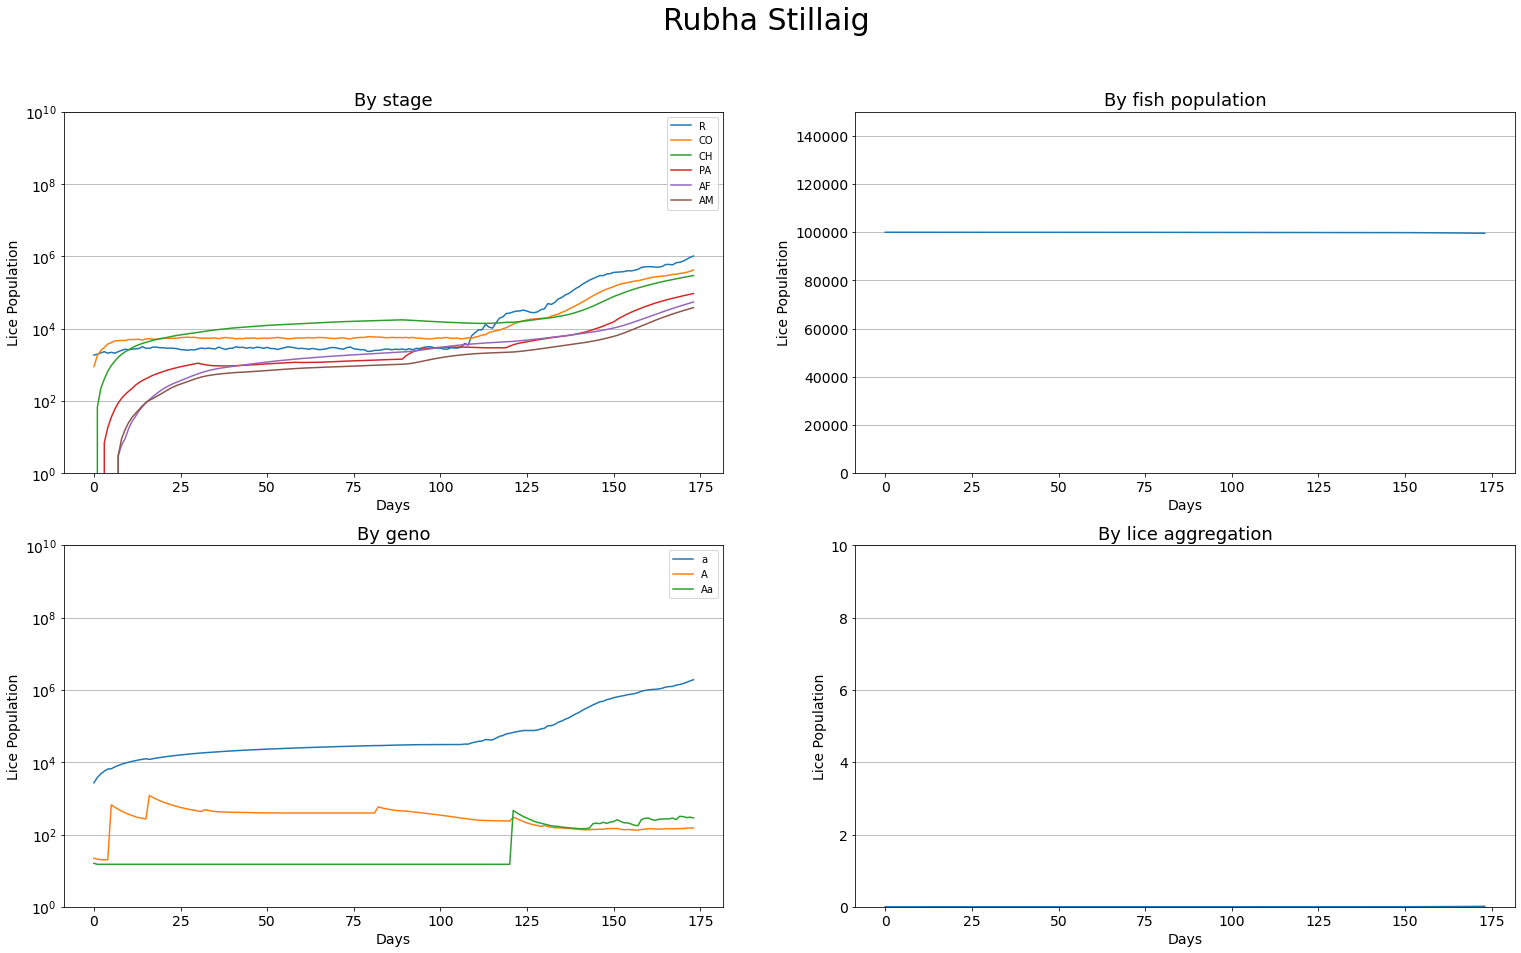

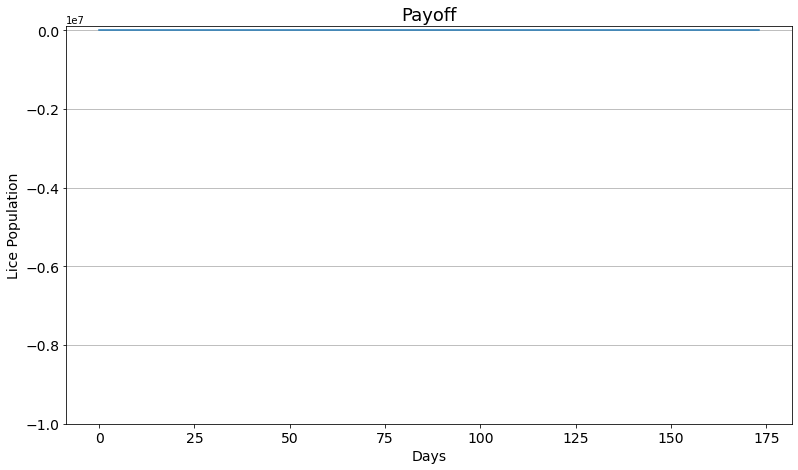

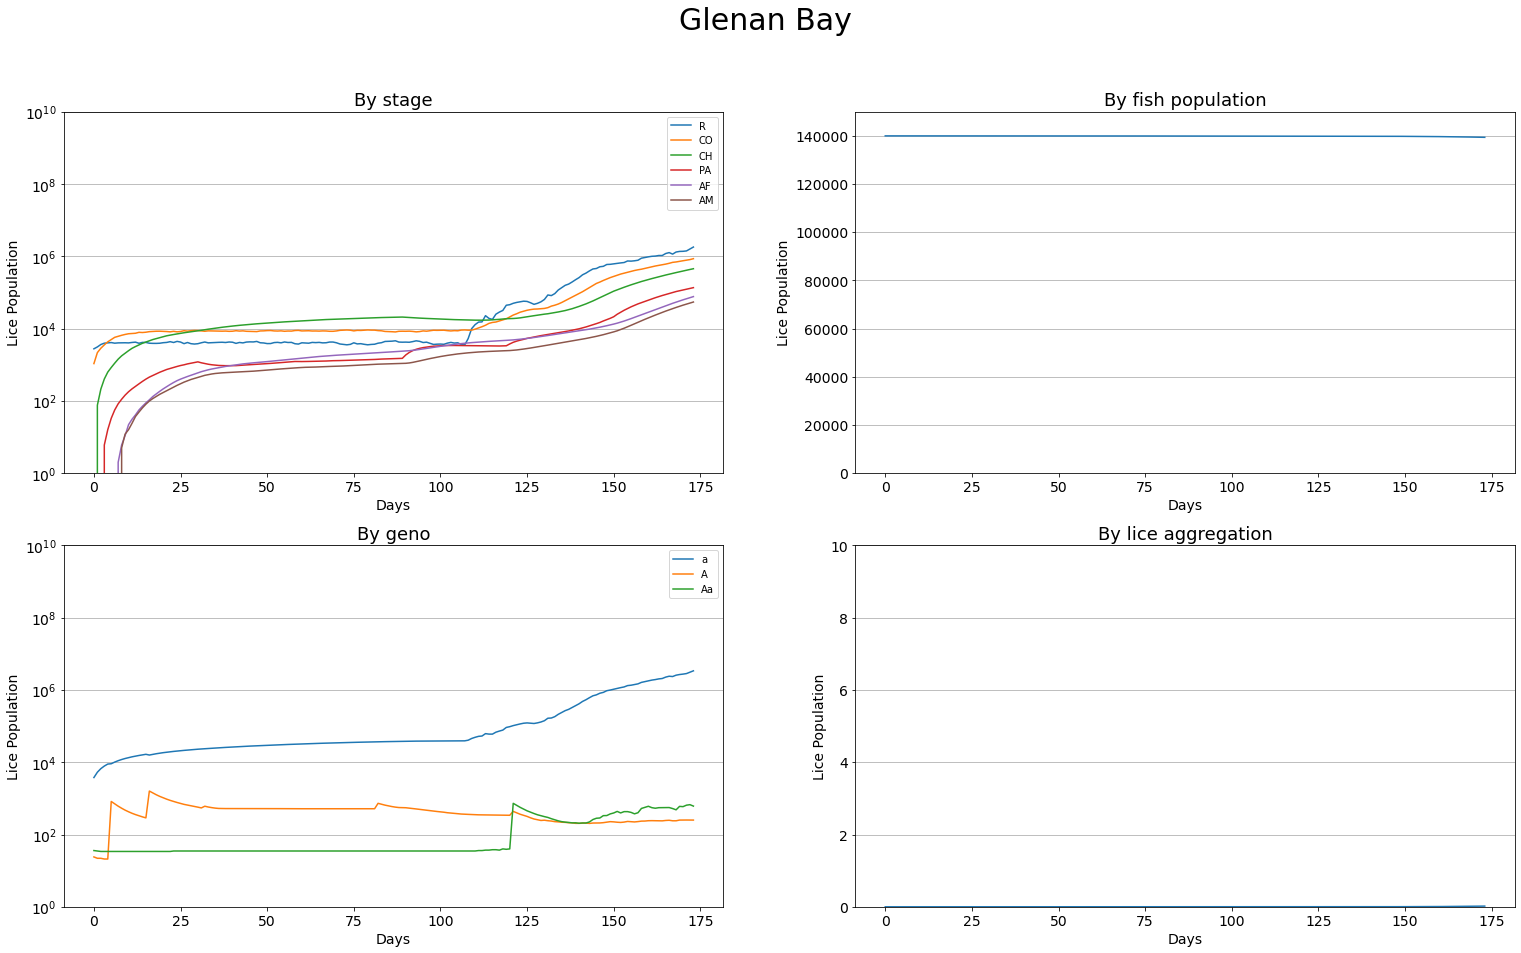

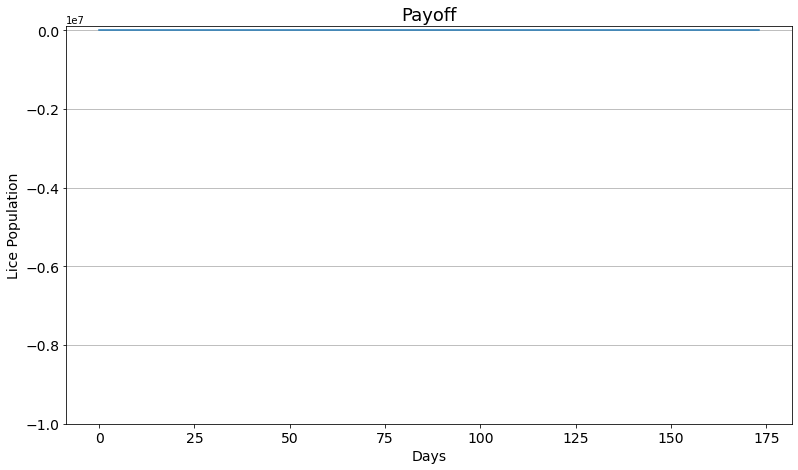

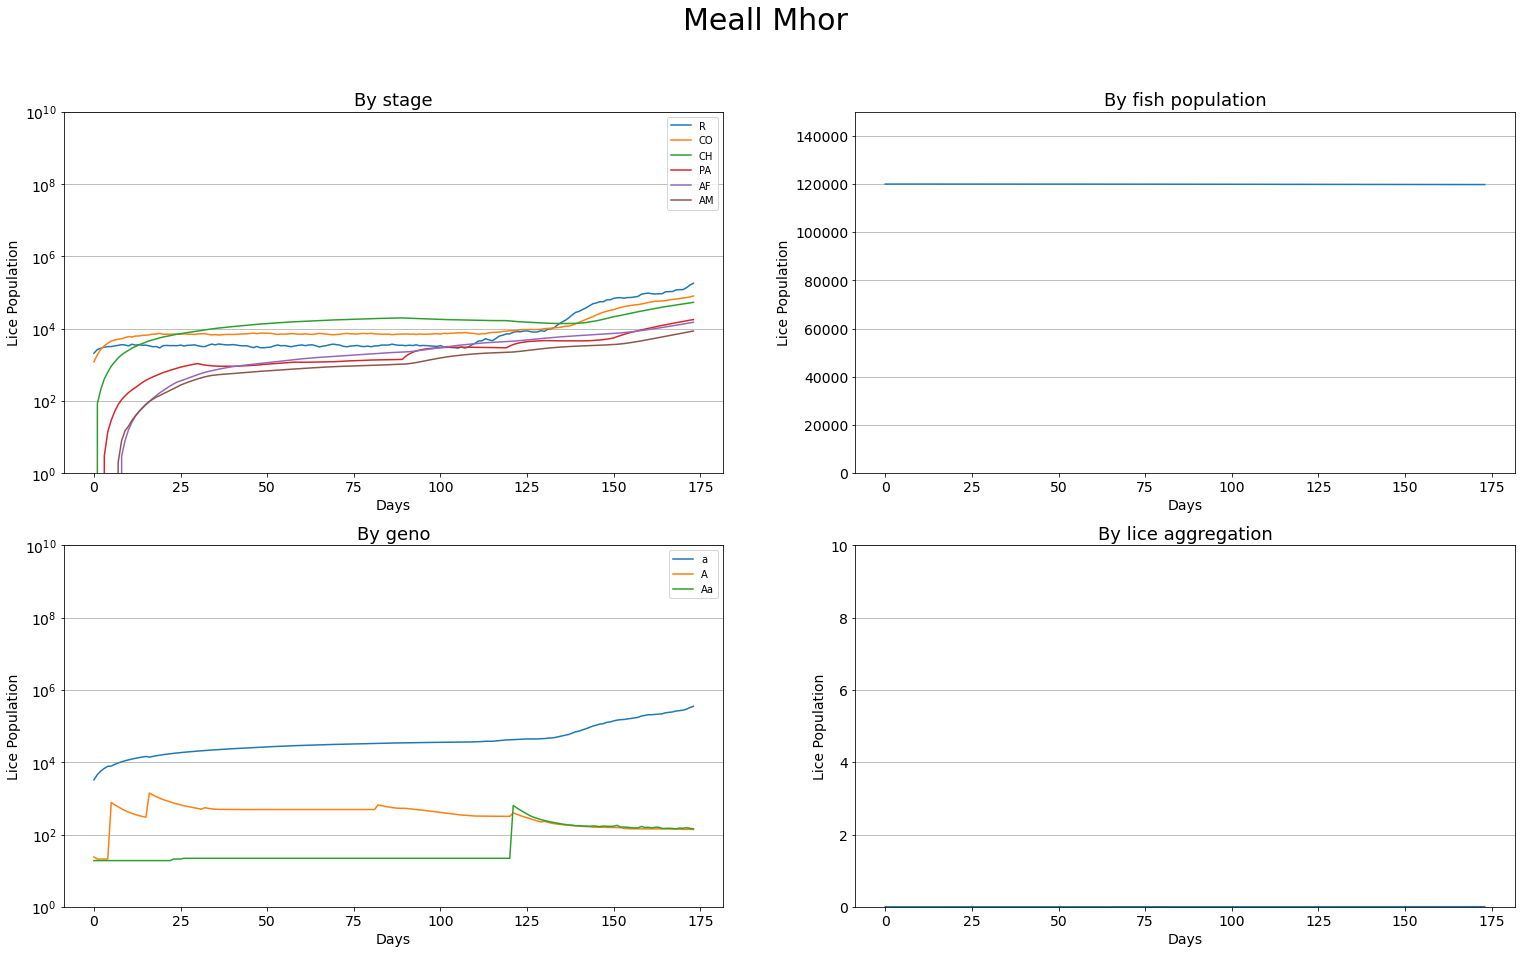

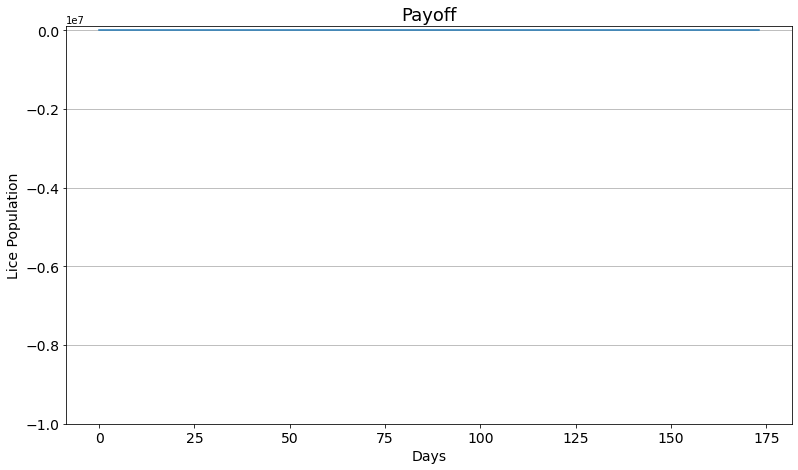

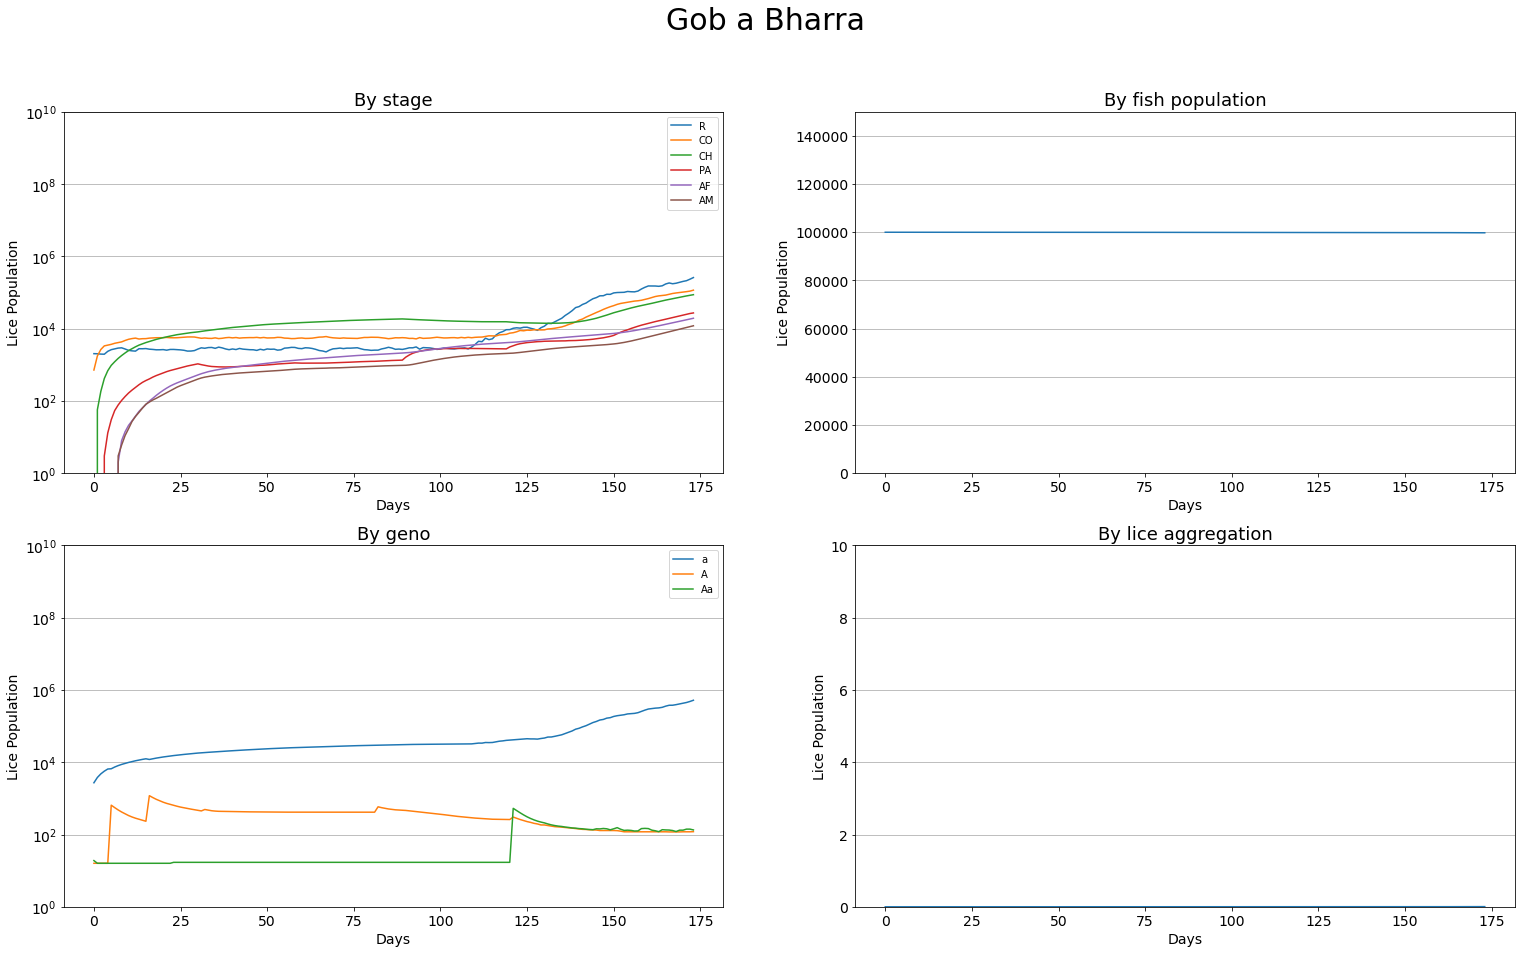

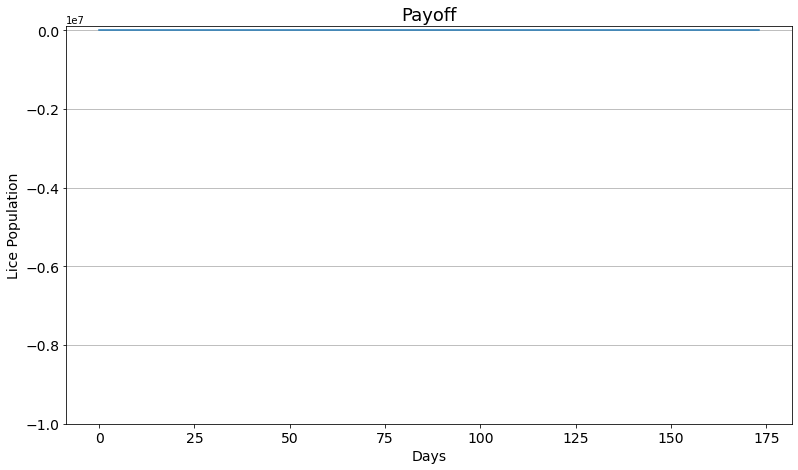

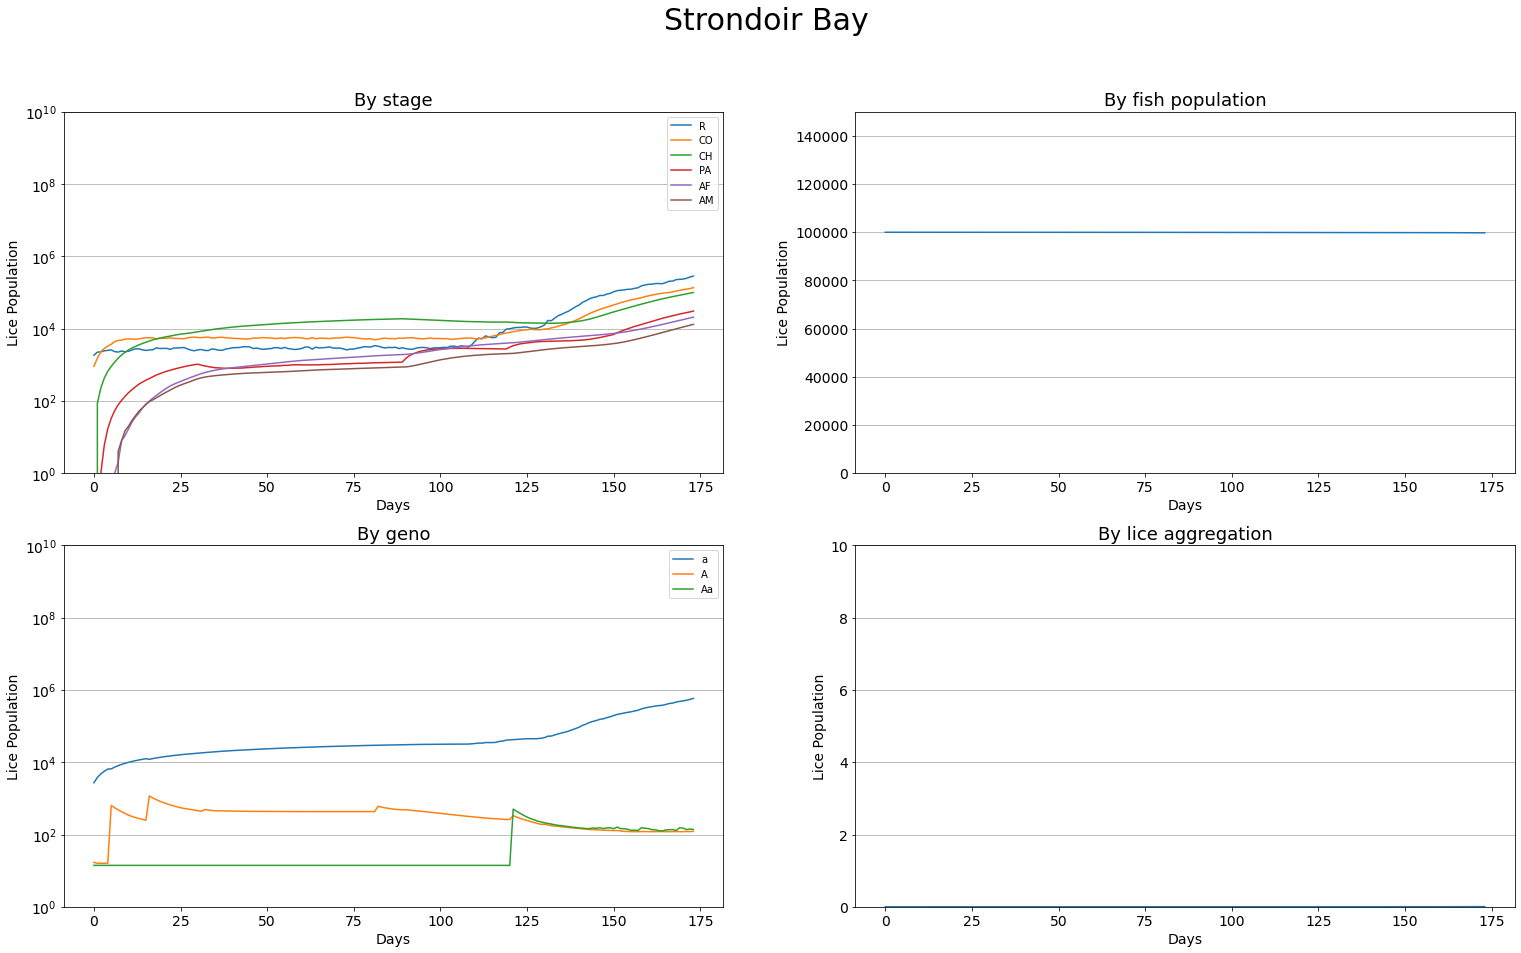

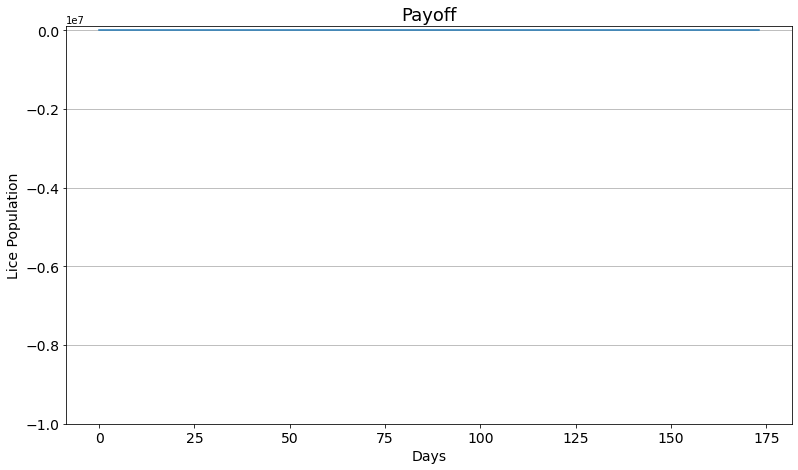

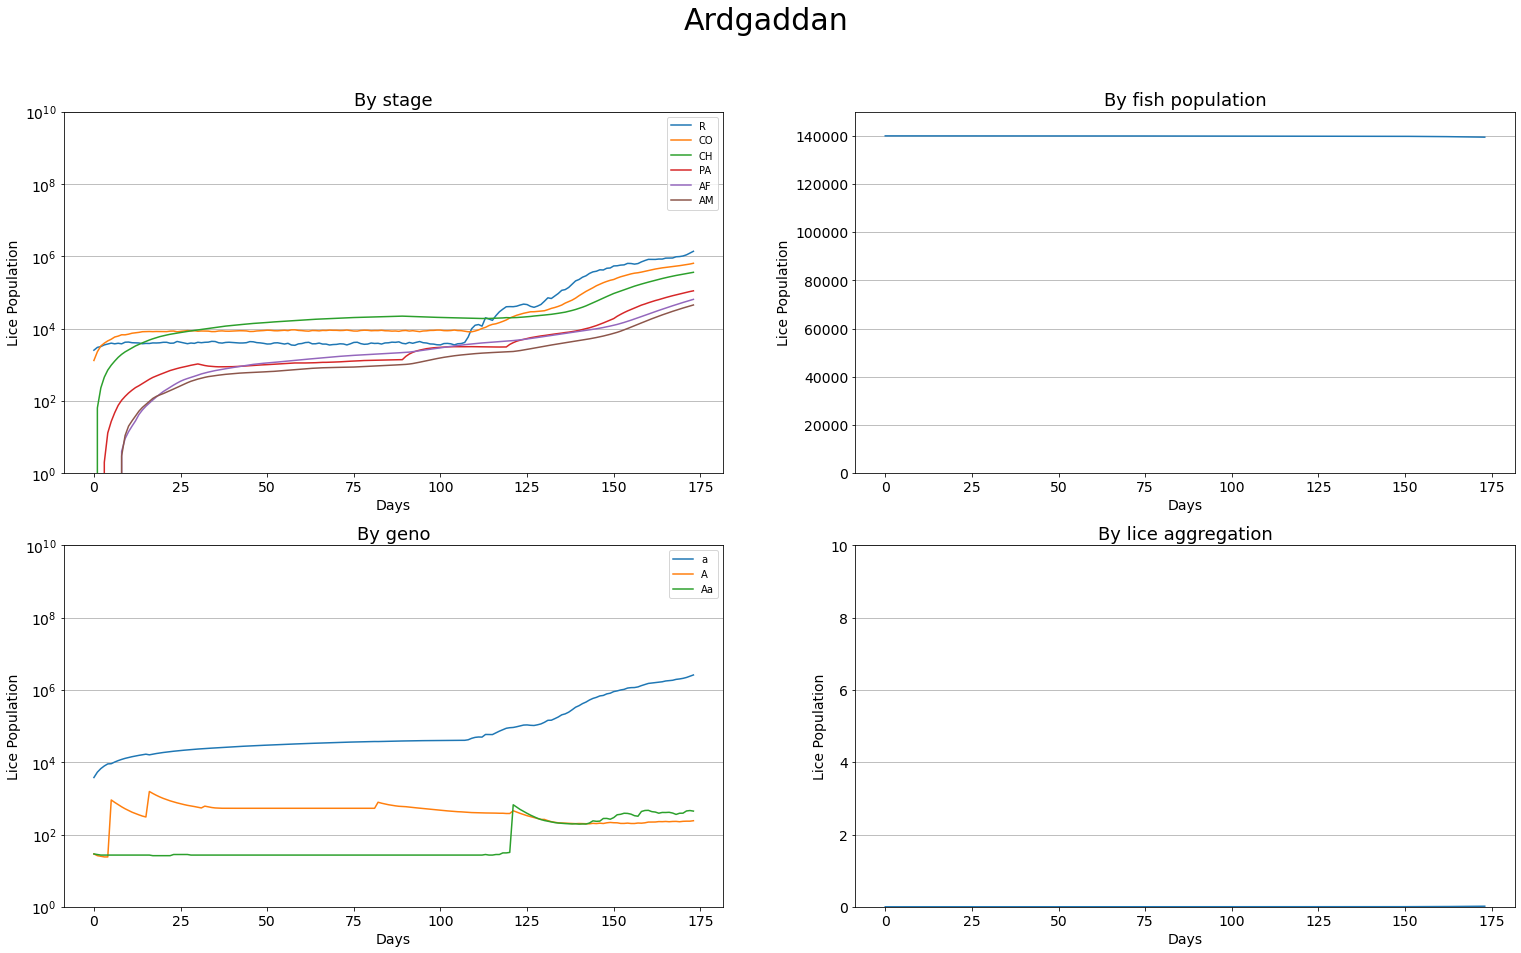

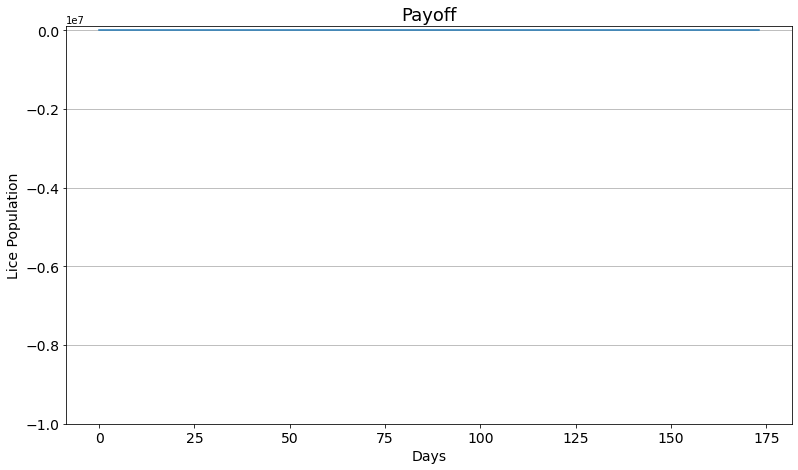

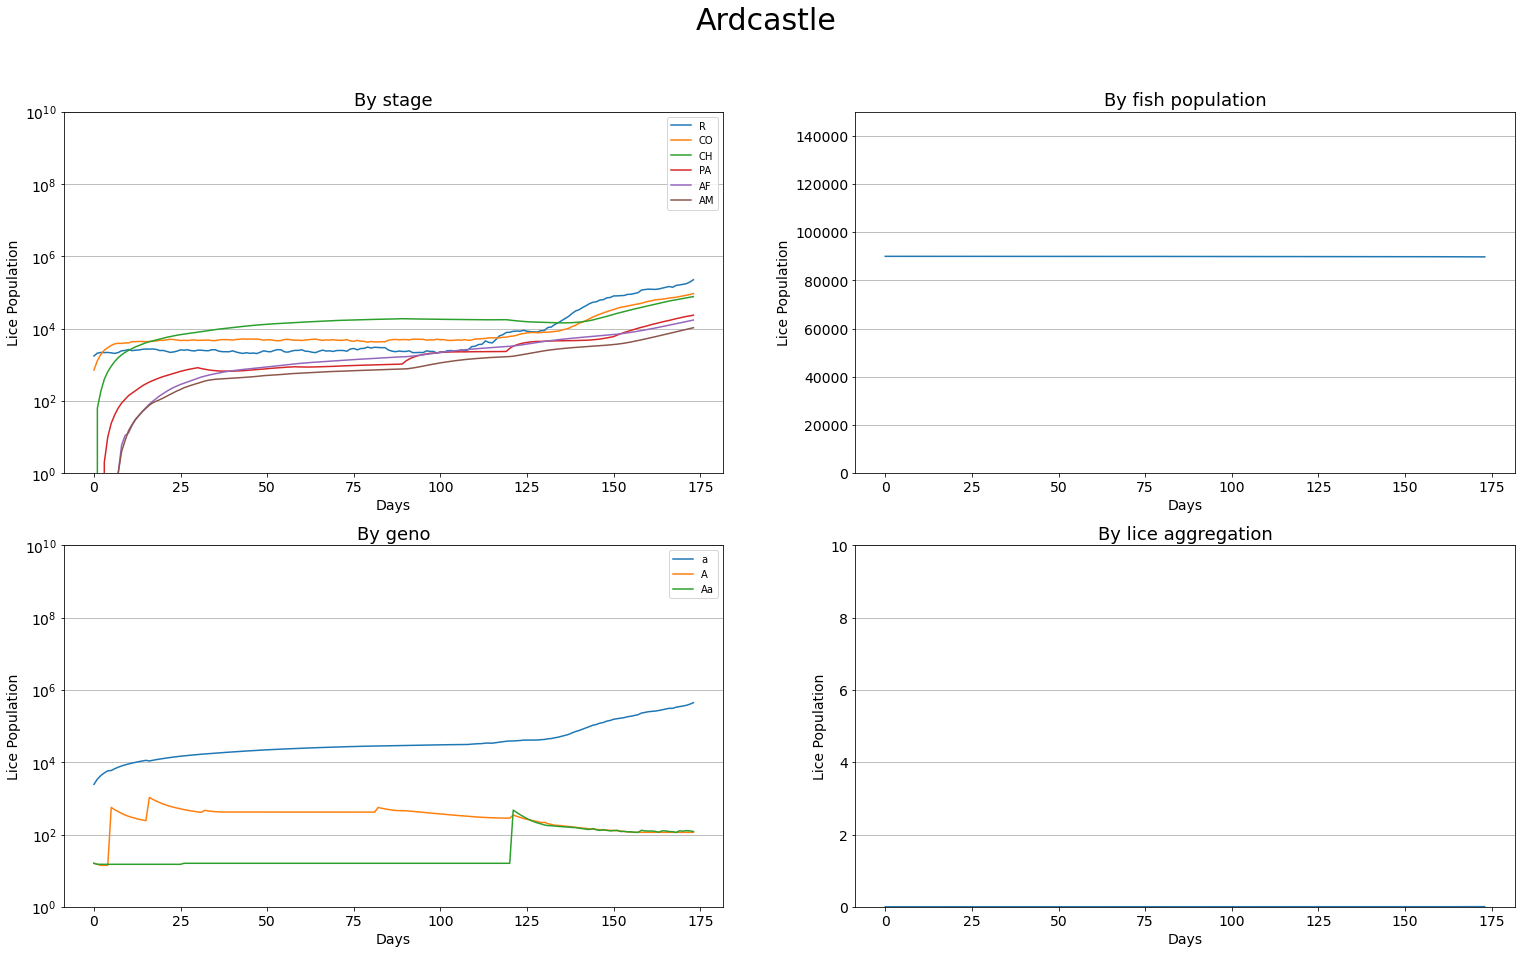

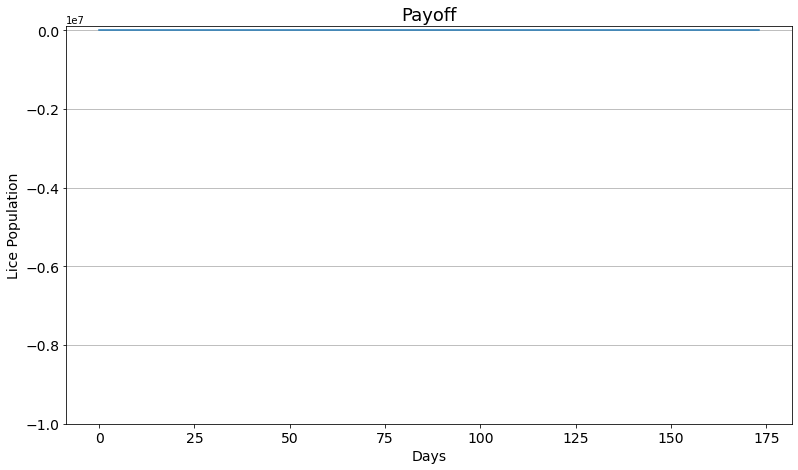

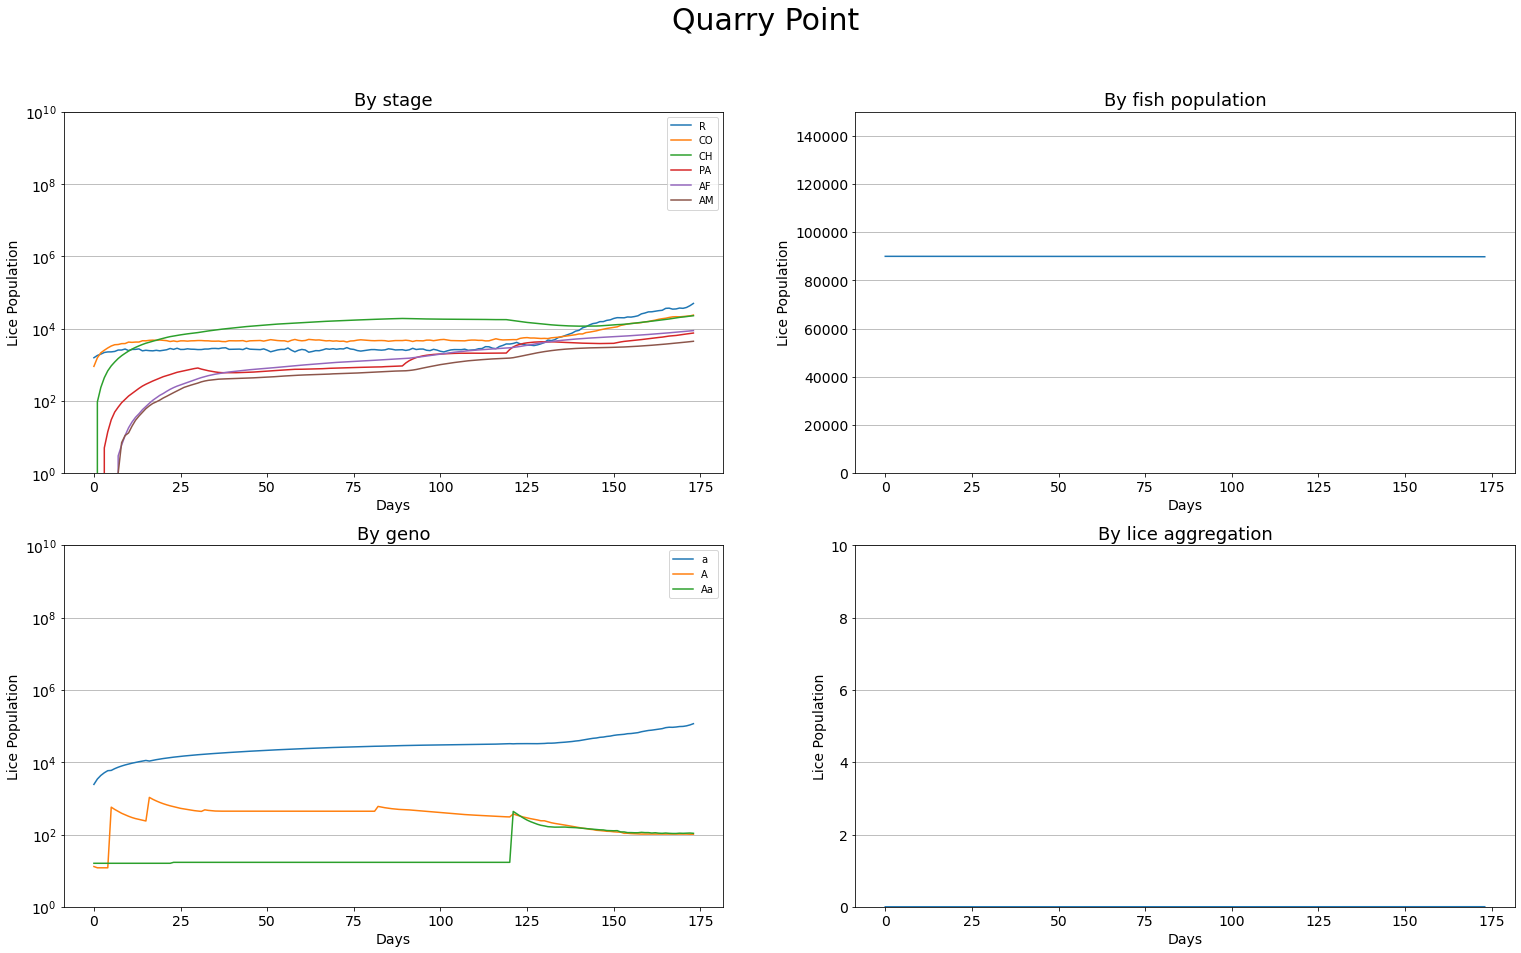

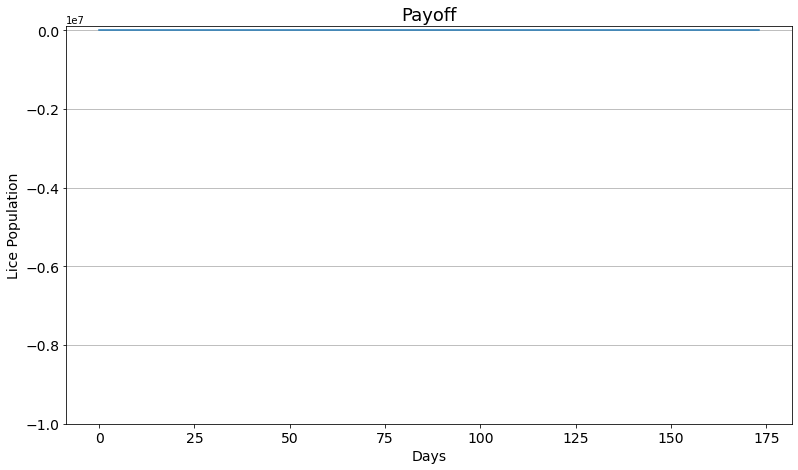

In [17]:
# config = Config("config_data/config.json", "config_data/Fyne_complete")

df = trials[0][0]
cfg = trials[0][2]

plot_data(df, cfg, "bernoulli_0.2")